In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
accelerate                   0.22.0
aiofiles                     23.2.1
aiohttp                      3.8.5
aiosignal                    1.3.1
altair                       5.0.1
annotated-types              0.6.0
anyio                        3.7.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bitsandbytes                 0.41.1
bleach                       6.0.0
blinker                      1.6.2
blis                         0.7.9
bs4                          0.0.1
cachetools                   5.3.1
catalogue                    2.0.8
cert


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\Devansh\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
import cv2
import imghdr

C:\Users\Devansh\AppData\Local\Temp\ipykernel_26508\456289392.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data'

In [3]:
image_exts = ['jpeg' , 'jpg' , 'bmp' , 'png']

In [4]:
import os

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints
Issue with image data\sad\.ipynb_checkpoints


In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 223 files belonging to 2 classes.


In [8]:
data_itr = data.as_numpy_iterator()

In [9]:
batch = data_itr.next()

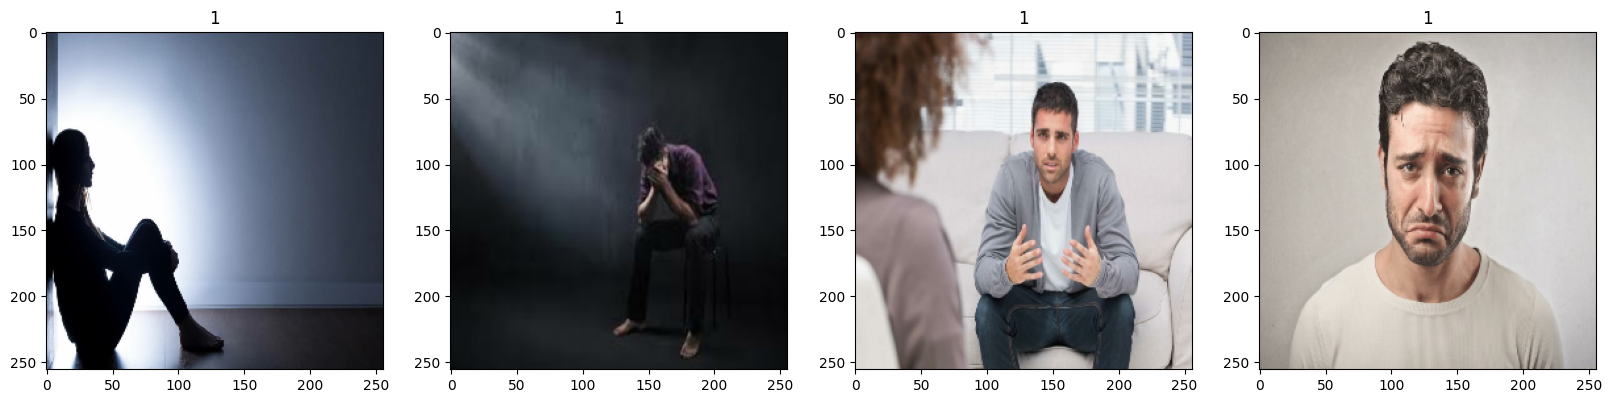

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.9655331 , 1.        , 0.996492  ],
          [0.9748162 , 1.        , 0.99926007],
          [0.9772978 , 0.9977253 , 0.98782194],
          ...,
          [0.9935355 , 0.9935355 , 0.9856924 ],
          [0.99607843, 0.99607843, 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ]],
 
         [[0.97130823, 0.99751836, 0.9950368 ],
          [0.9756959 , 0.9955602 , 0.99112046],
          [0.9784781 , 0.9958413 , 0.984054  ],
          ...,
          [0.9943401 , 0.9951447 , 0.98488784],
          [0.99607843, 0.99607843, 0.9882353 ],
          [0.99607843, 0.99607843, 0.9882353 ]],
 
         [[0.9768995 , 0.9962929 , 0.9925858 ],
          [0.97234255, 0.99336773, 0.98020834],
          [0.97889215, 0.9937877 , 0.9743566 ],
          ...,
          [0.99607843, 0.99862134, 0.9831495 ],
          [0.9965147 , 0.9965147 , 0.98867154],
          [0.9981465 , 0.9981465 , 0.99030334]],
 
         ...,
 
         [[0.99379593, 0.99379593, 0.99379593],
          [0.99379

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

4

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Devansh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 745ms/step - accuracy: 0.5073 - loss: 1.9539 - val_accuracy: 0.3750 - val_loss: 0.6990
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 609ms/step - accuracy: 0.4292 - loss: 0.7004 - val_accuracy: 0.6250 - val_loss: 0.6976
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 620ms/step - accuracy: 0.6875 - loss: 0.6824 - val_accuracy: 0.6250 - val_loss: 0.7008
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 573ms/step - accuracy: 0.6823 - loss: 0.6729 - val_accuracy: 0.7188 - val_loss: 0.6487
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 598ms/step - accuracy: 0.6562 - loss: 0.6749 - val_accuracy: 0.6875 - val_loss: 0.6530
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step - accuracy: 0.6792 - loss: 0.6546 - val_accuracy: 0.8125 - val_loss: 0.5894
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 0.6802 - loss: 0.6259 - val_accuracy: 0.6562 - val_loss: 0.6328
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 589ms/step - accuracy: 0.7135 - loss: 0.5983 - val_accuracy: 0.7500 - val_loss:

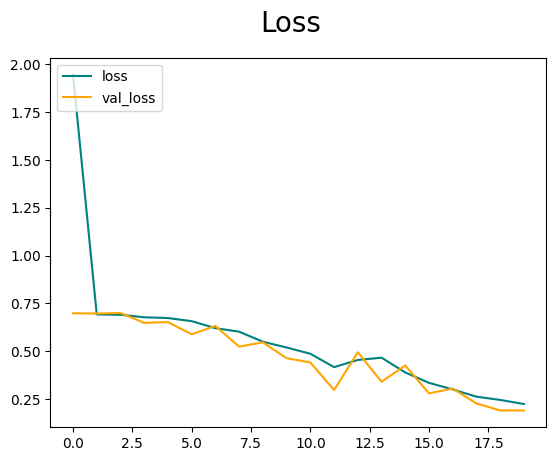

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

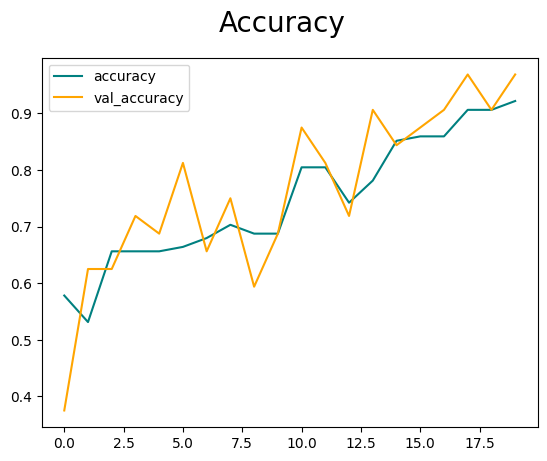

In [29]:

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [30]:

print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


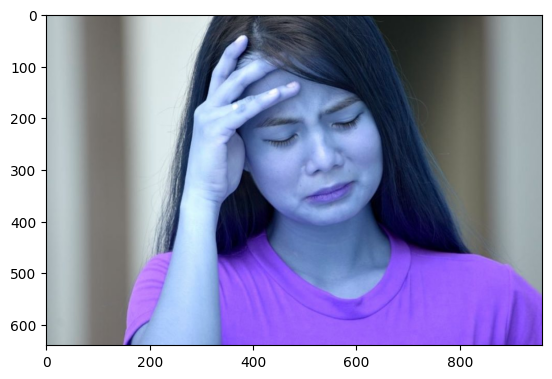

In [38]:
import cv2
img = cv2.imread('test_sad.jpg')
plt.imshow(img)
plt.show()

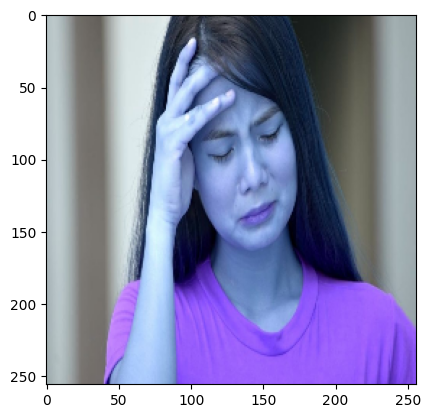

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [41]:
yhat

array([[0.8980335]], dtype=float32)

In [42]:

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
